In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [18]:
demographic_files = [
    r"C:\Users\drith\OneDrive\Pictures\OneDrive\Desktop\pro\api_data_aadhar_demographic_0_500000.csv",
    r"C:\Users\drith\OneDrive\Pictures\OneDrive\Desktop\pro\api_data_aadhar_demographic_500000_1000000.csv",
    r"C:\Users\drith\OneDrive\Pictures\OneDrive\Desktop\pro\api_data_aadhar_demographic_1000000_1500000.csv",
    r"C:\Users\drith\OneDrive\Pictures\OneDrive\Desktop\pro\api_data_aadhar_demographic_1500000_2000000.csv",
    r"C:\Users\drith\OneDrive\Pictures\OneDrive\Desktop\pro\api_data_aadhar_demographic_2000000_2071700.csv"
]



In [19]:
r"C:\Users\drith\OneDrive\Pictures\OneDrive\Desktop\pro"


'C:\\Users\\drith\\OneDrive\\Pictures\\OneDrive\\Desktop\\pro'

In [20]:
import os

path = r"C:\Users\drith\OneDrive\Pictures\OneDrive\Desktop\pro"
print("Exists:", os.path.exists(path))
print("Files:", os.listdir(path))


Exists: True
Files: ['api_data_aadhar_biometric_0_500000.csv', 'api_data_aadhar_biometric_1000000_1500000.csv', 'api_data_aadhar_biometric_1500000_1861108.csv', 'api_data_aadhar_biometric_500000_1000000.csv', 'api_data_aadhar_demographic_0_500000.csv', 'api_data_aadhar_demographic_1000000_1500000.csv', 'api_data_aadhar_demographic_1500000_2000000.csv', 'api_data_aadhar_demographic_2000000_2071700.csv', 'api_data_aadhar_demographic_500000_1000000.csv']


In [21]:
import glob
import pandas as pd

biometric_files = glob.glob(r"C:\Users\drith\OneDrive\Pictures\OneDrive\Desktop\pro\api_data_aadhar_biometric_*.csv")

print("Files detected:", biometric_files)

bio_df = pd.concat(
    [pd.read_csv(f) for f in biometric_files],
    ignore_index=True
)

print("Shape:", bio_df.shape)


Files detected: ['C:\\Users\\drith\\OneDrive\\Pictures\\OneDrive\\Desktop\\pro\\api_data_aadhar_biometric_0_500000.csv', 'C:\\Users\\drith\\OneDrive\\Pictures\\OneDrive\\Desktop\\pro\\api_data_aadhar_biometric_1000000_1500000.csv', 'C:\\Users\\drith\\OneDrive\\Pictures\\OneDrive\\Desktop\\pro\\api_data_aadhar_biometric_1500000_1861108.csv', 'C:\\Users\\drith\\OneDrive\\Pictures\\OneDrive\\Desktop\\pro\\api_data_aadhar_biometric_500000_1000000.csv']
Shape: (1861108, 6)


In [23]:
import glob
import pandas as pd

demographic_path = r"C:\Users\drith\OneDrive\Pictures\OneDrive\Desktop\pro"

demographic_files = glob.glob(
    demographic_path + r"\api_data_aadhar_demographic_*.csv"
)

print("Demographic files found:", demographic_files)

demo_df = pd.concat(
    [pd.read_csv(f) for f in demographic_files],
    ignore_index=True
)

print("demo_df loaded successfully")
print("Rows:", demo_df.shape[0])


Demographic files found: ['C:\\Users\\drith\\OneDrive\\Pictures\\OneDrive\\Desktop\\pro\\api_data_aadhar_demographic_0_500000.csv', 'C:\\Users\\drith\\OneDrive\\Pictures\\OneDrive\\Desktop\\pro\\api_data_aadhar_demographic_1000000_1500000.csv', 'C:\\Users\\drith\\OneDrive\\Pictures\\OneDrive\\Desktop\\pro\\api_data_aadhar_demographic_1500000_2000000.csv', 'C:\\Users\\drith\\OneDrive\\Pictures\\OneDrive\\Desktop\\pro\\api_data_aadhar_demographic_2000000_2071700.csv', 'C:\\Users\\drith\\OneDrive\\Pictures\\OneDrive\\Desktop\\pro\\api_data_aadhar_demographic_500000_1000000.csv']
demo_df loaded successfully
Rows: 2071700


In [24]:
biometric_path = r"C:\Users\drith\OneDrive\Pictures\OneDrive\Desktop\pro"

biometric_files = glob.glob(
    biometric_path + r"\api_data_aadhar_biometric_*.csv"
)

print("Biometric files found:", biometric_files)

bio_df = pd.concat(
    [pd.read_csv(f) for f in biometric_files],
    ignore_index=True
)

print("bio_df loaded successfully")
print("Rows:", bio_df.shape[0])


Biometric files found: ['C:\\Users\\drith\\OneDrive\\Pictures\\OneDrive\\Desktop\\pro\\api_data_aadhar_biometric_0_500000.csv', 'C:\\Users\\drith\\OneDrive\\Pictures\\OneDrive\\Desktop\\pro\\api_data_aadhar_biometric_1000000_1500000.csv', 'C:\\Users\\drith\\OneDrive\\Pictures\\OneDrive\\Desktop\\pro\\api_data_aadhar_biometric_1500000_1861108.csv', 'C:\\Users\\drith\\OneDrive\\Pictures\\OneDrive\\Desktop\\pro\\api_data_aadhar_biometric_500000_1000000.csv']
bio_df loaded successfully
Rows: 1861108


In [25]:
# Detect date columns automatically
def get_date_col(df):
    for col in df.columns:
        if 'date' in col.lower():
            return col
    raise ValueError("No date column found")

demo_date_col = get_date_col(demo_df)
bio_date_col = get_date_col(bio_df)

# Convert to datetime
demo_df[demo_date_col] = pd.to_datetime(demo_df[demo_date_col], errors='coerce')
bio_df[bio_date_col] = pd.to_datetime(bio_df[bio_date_col], errors='coerce')

# Remove invalid dates only
demo_df = demo_df.dropna(subset=[demo_date_col]).copy()
bio_df = bio_df.dropna(subset=[bio_date_col]).copy()

# Monthly aggregation
demo_df['month'] = demo_df[demo_date_col].dt.to_period('M')
bio_df['month'] = bio_df[bio_date_col].dt.to_period('M')

print("Date processing completed successfully")
demo_df.head()


Date processing completed successfully


,date,state,district,pincode,demo_age_5_17,demo_age_17_,month
0,2025-01-03,Uttar Pradesh,Gorakhpur,273213,49,529,2025-01
1,2025-01-03,Andhra Pradesh,Chittoor,517132,22,375,2025-01
2,2025-01-03,Gujarat,Rajkot,360006,65,765,2025-01
3,2025-01-03,Andhra Pradesh,Srikakulam,532484,24,314,2025-01
4,2025-01-03,Rajasthan,Udaipur,313801,45,785,2025-01


In [28]:
import pandas as pd

# -------------------------------
# 1. SAFETY CHECK
# -------------------------------
if 'demo_df' not in globals():
    raise NameError("demo_df is not defined. Load the data first.")


# -------------------------------
# 2. CONFIRM REQUIRED COLUMNS
# -------------------------------
required_cols = ['state', 'demo_age_5_17', 'demo_age_17_']

for col in required_cols:
    if col not in demo_df.columns:
        raise ValueError(f"Required column missing: {col}")

print("Required columns found ✔")


# -------------------------------
# 3. CREATE TOTAL COUNT COLUMN
# -------------------------------
demo_df['total_count'] = (
    pd.to_numeric(demo_df['demo_age_5_17'], errors='coerce').fillna(0) +
    pd.to_numeric(demo_df['demo_age_17_'], errors='coerce').fillna(0)
)

print("Total count column created ✔")


# -------------------------------
# 4. GROUPBY: TOP 10 STATES
# -------------------------------
top_states = (
    demo_df
    .groupby('state')['total_count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 States by Aadhaar Demographic Updates:")
top_states


Required columns found ✔
Total count column created ✔

Top 10 States by Aadhaar Demographic Updates:


state
Uttar Pradesh     5548061
Bihar             2901110
Maharashtra       2827030
West Bengal       2417391
Madhya Pradesh    2230083
Rajasthan         2126935
Andhra Pradesh    1550064
Chhattisgarh      1422949
Tamil Nadu        1332896
Gujarat           1286277
Name: total_count, dtype: int64

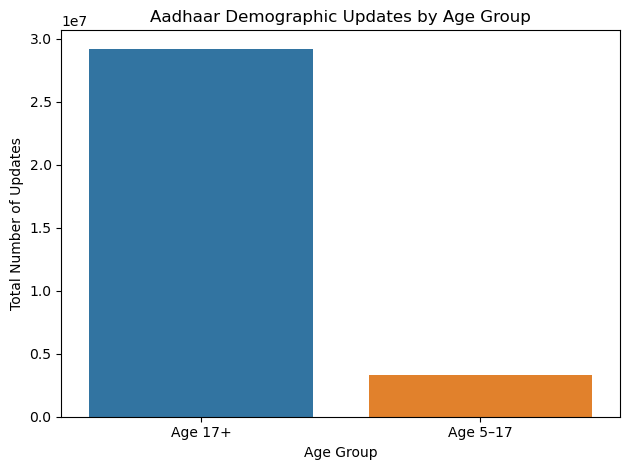

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# 1. SAFETY CHECK
# -------------------------------
if 'demo_df' not in globals():
    raise NameError("demo_df is not defined. Load the data first.")


# -------------------------------
# 2. PREPARE DATA FOR PLOTTING
#    Convert wide → long format
# -------------------------------
plot_df = demo_df.melt(
    id_vars=['state'],
    value_vars=['demo_age_5_17', 'demo_age_17_'],
    var_name='age_group',
    value_name='count'
)

# Clean labels
plot_df['age_group'] = plot_df['age_group'].replace({
    'demo_age_5_17': 'Age 5–17',
    'demo_age_17_': 'Age 17+'
})

# Ensure numeric
plot_df['count'] = pd.to_numeric(plot_df['count'], errors='coerce')
plot_df.dropna(inplace=True)


# -------------------------------
# 3. AGGREGATE FOR VISUAL CLARITY
# -------------------------------
plot_df = (
    plot_df
    .groupby('age_group', as_index=False)['count']
    .sum()
)


# -------------------------------
# 4. BAR PLOT
# -------------------------------
sns.barplot(
    data=plot_df,
    x='age_group',
    y='count'
)

plt.title("Aadhaar Demographic Updates by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Number of Updates")
plt.tight_layout()
plt.show()


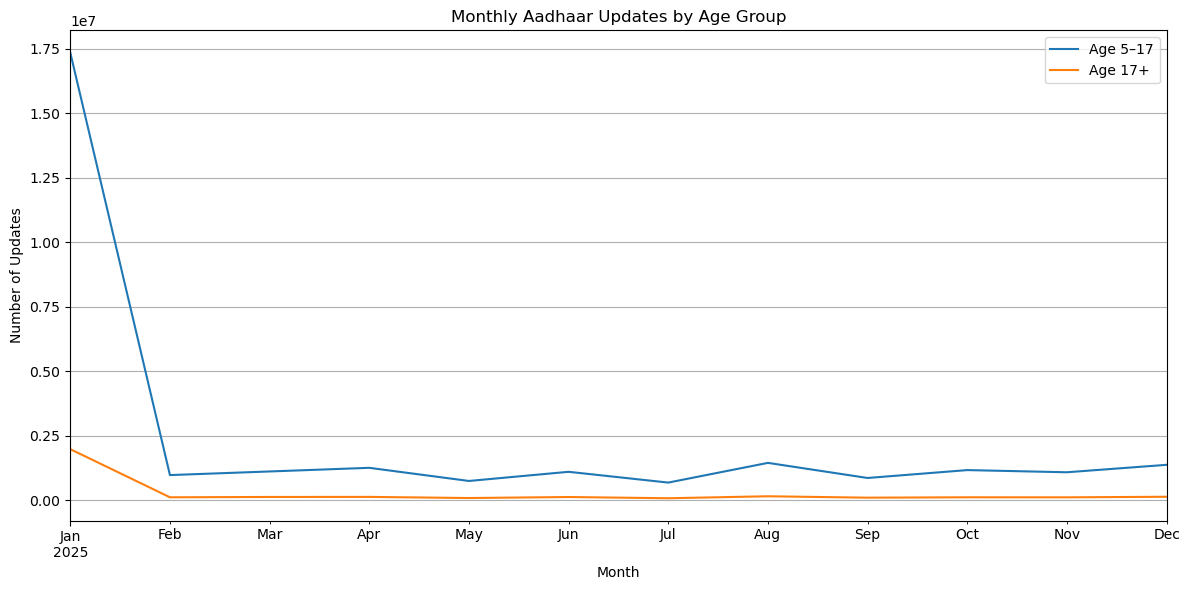

In [30]:
pivot_age = demo_df.pivot_table(
    values=['demo_age_5_17', 'demo_age_17_'],
    index='month',
    aggfunc='sum'
).sort_index()

pivot_age.columns = ['Age 5–17', 'Age 17+']

pivot_age.plot(figsize=(12, 6))

plt.title("Monthly Aadhaar Updates by Age Group")
plt.xlabel("Month")
plt.ylabel("Number of Updates")
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import numpy as np

# Safety check
if 'demo_df' not in globals():
    raise NameError("demo_df not found. Load data first.")

# Total updates per record
demo_df['total_count'] = (
    pd.to_numeric(demo_df['demo_age_5_17'], errors='coerce').fillna(0) +
    pd.to_numeric(demo_df['demo_age_17_'], errors='coerce').fillna(0)
)


In [32]:
state_insight = (
    demo_df
    .groupby('state')['total_count']
    .sum()
    .sort_values(ascending=False)
)

state_insight.head(10)


state
Uttar Pradesh     5548061
Bihar             2901110
Maharashtra       2827030
West Bengal       2417391
Madhya Pradesh    2230083
Rajasthan         2126935
Andhra Pradesh    1550064
Chhattisgarh      1422949
Tamil Nadu        1332896
Gujarat           1286277
Name: total_count, dtype: int64

In [33]:
age_insight = demo_df[['demo_age_5_17', 'demo_age_17_']].sum()

age_insight_df = age_insight.reset_index()
age_insight_df.columns = ['age_group', 'total_updates']

age_insight_df


,age_group,total_updates
0,demo_age_5_17,3282163
1,demo_age_17_,29189596


In [34]:
monthly_trend = (
    demo_df
    .groupby('month')['total_count']
    .sum()
    .sort_index()
)

monthly_trend


month
2025-01    19330505
2025-02     1094259
2025-03     1246835
2025-04     1390546
2025-05      837176
2025-06     1231717
2025-07      766285
2025-08     1606479
2025-09      966948
2025-10     1287725
2025-11     1201436
2025-12     1511848
Freq: M, Name: total_count, dtype: int64

In [ ]:
#ANOMALY DETECTION

In [35]:
from scipy.stats import zscore

monthly_df = monthly_trend.reset_index()
monthly_df['z_score'] = zscore(monthly_df['total_count'])

anomalous_months = monthly_df[abs(monthly_df['z_score']) > 3]

anomalous_months


,month,total_count,z_score
0,2025-01,19330505,3.312811


In [36]:
district_summary = (
    demo_df
    .groupby(['state', 'district'])['total_count']
    .sum()
    .reset_index()
)

# Calculate threshold
threshold = district_summary['total_count'].mean() + 3 * district_summary['total_count'].std()

district_anomalies = district_summary[
    district_summary['total_count'] > threshold
]

district_anomalies.sort_values('total_count', ascending=False).head(10)


,state,district,total_count
553,Maharashtra,Thane,297650
260,Gujarat,Surat,278361
1028,West Bengal,South 24 Parganas,276287
544,Maharashtra,Pune,274268
218,Delhi,North West Delhi,267159
1014,West Bengal,Murshidabad,257600
382,Karnataka,Bengaluru,231796
750,Rajasthan,Jaipur,202791
223,Delhi,West Delhi,199801
229,Gujarat,Ahmedabad,192613


In [37]:
demo_df['age_ratio'] = (
    demo_df['demo_age_17_'] /
    (demo_df['demo_age_5_17'] + 1)
)

age_anomaly = demo_df[
    demo_df['age_ratio'] > demo_df['age_ratio'].quantile(0.99)
][['state', 'district', 'age_ratio']]

age_anomaly.head(10)


,state,district,age_ratio
81,Tamil Nadu,Cuddalore,47.272727
157,Jharkhand,Bokaro,37.783333
460,Chhattisgarh,Baloda Bazar,39.727273
495,Rajasthan,Pali,39.636364
661,West Bengal,Jalpaiguri,40.428571
718,Maharashtra,Nagpur,48.375000
796,Jharkhand,Bokaro,54.500000
797,Rajasthan,Bhilwara,48.179104
845,Punjab,Bathinda,34.714286
854,Rajasthan,Banswara,61.363636


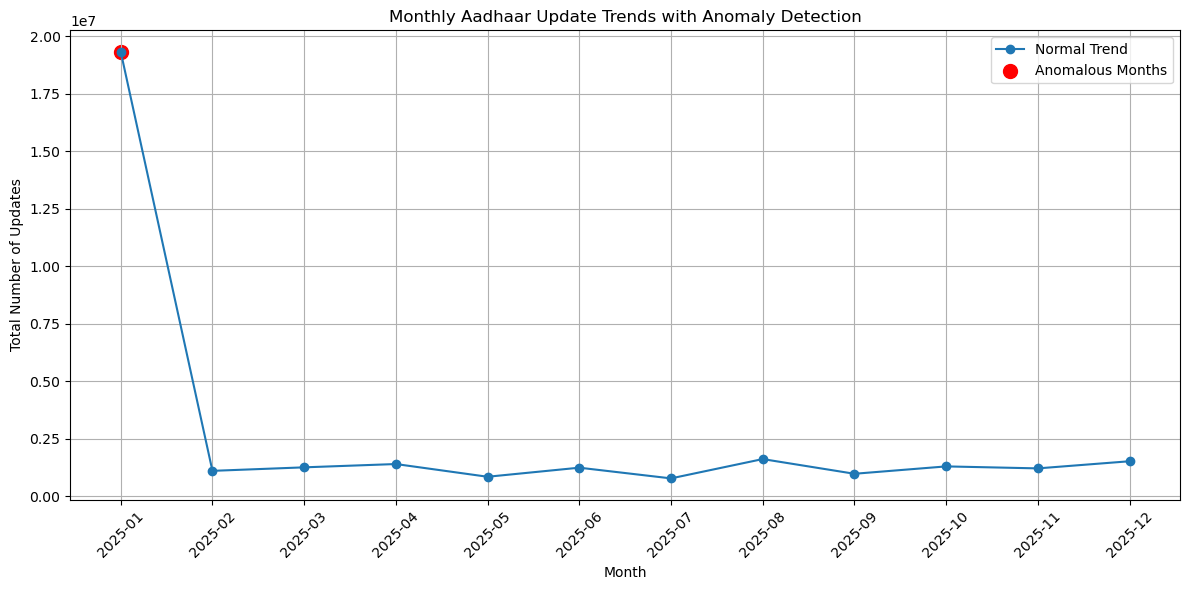

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# -------------------------------
# Re-create monthly trend safely
# -------------------------------
monthly_trend = (
    demo_df
    .groupby('month')['total_count']
    .sum()
    .sort_index()
)

monthly_df = monthly_trend.reset_index()
monthly_df.columns = ['month', 'total_count']
monthly_df['z_score'] = zscore(monthly_df['total_count'])

# Identify anomalies
anomaly_df = monthly_df[abs(monthly_df['z_score']) > 3]

# -------------------------------
# Plot
# -------------------------------
plt.figure(figsize=(12, 6))

plt.plot(
    monthly_df['month'].astype(str),
    monthly_df['total_count'],
    marker='o',
    label='Normal Trend'
)

plt.scatter(
    anomaly_df['month'].astype(str),
    anomaly_df['total_count'],
    color='red',
    s=100,
    label='Anomalous Months'
)

plt.title("Monthly Aadhaar Update Trends with Anomaly Detection")
plt.xlabel("Month")
plt.ylabel("Total Number of Updates")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


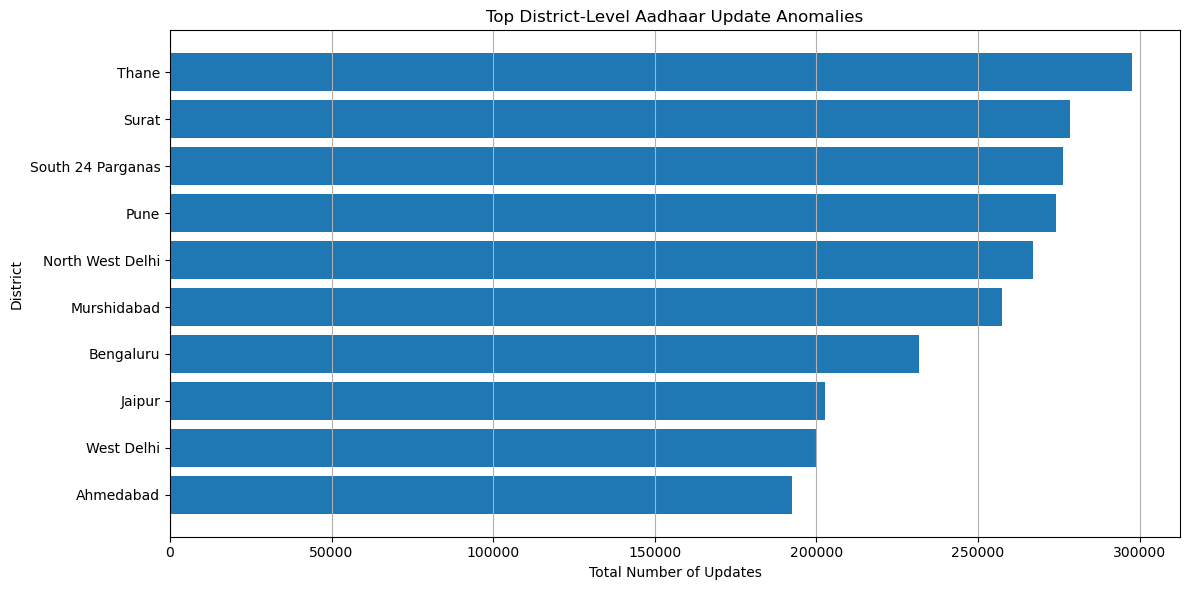

In [39]:
# -------------------------------
# District anomaly summary
# -------------------------------
district_summary = (
    demo_df
    .groupby(['state', 'district'])['total_count']
    .sum()
    .reset_index()
)

threshold = (
    district_summary['total_count'].mean() +
    3 * district_summary['total_count'].std()
)

district_anomalies = district_summary[
    district_summary['total_count'] > threshold
].sort_values('total_count', ascending=False)

# -------------------------------
# Bar Chart (Top 10 Anomalies)
# -------------------------------
plt.figure(figsize=(12, 6))

plt.barh(
    district_anomalies['district'].head(10),
    district_anomalies['total_count'].head(10)
)

plt.xlabel("Total Number of Updates")
plt.ylabel("District")
plt.title("Top District-Level Aadhaar Update Anomalies")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()
